# Actividad 1 - Módulo 4 : ANÁLISIS EXPLORATORIO Y PROGRAMACIÓN ESTADÍSTICA
### CONCEPTOS BÁSICOS DE ESTADÍSTICA DESCRIPTIVA
#### Autor: Nicolás Núñez

### Ejercicio 1
Clasifique las variables según corresponda.

1. Vivienda:
    - Tipo de vivienda: Cualitativa nominal.
    - Número de integrantes: Cuantitativa discreta.
    - Edad de cada integrante: Cuantitativa discreta.
2. Paciente:
    - Fonasa: Cualitativa nominal.
    - Estatura: Cuantitativa continua.
    - Peso: Cuantativa continua
    - Especialidad de consulta: Cualititativa nominal.
3. Alumno PDT:
    - Puntaje: Cuantitativa discreta.
    - Preferencia de postulacion a la carrera: Cualitativa ordinal.

### Ejercicio 2
Considere el siguiente conjunto de datos, el que describe, el tipo de consulta
realizada por un alumno(a) al servicio de salud de la Universidad X durante
Junio del 2022.

Tipo de consulta|Código
--|--
1 5 3 1 2 4 1 3 1 5|1: Médico
2 1 1 5 3 1 2 1 4 1|2: Nutricionista
4 1 3 1 5 1 2 1 1 2|3: Ginecólogo
5 1 1 5 1 5 3 1 2 1|4: Psicólogo
2 3 1 1 2 1 5 1 5 1|5: Dentista

1. Identifique el tipo de variable.
    - R: Cualitativa nominal

2. Construya una tabla frecuencia apropiada para resumir los datos.

In [56]:
from pandas import DataFrame

# Datos de la consulta
consultas = DataFrame(
    {'Consulta' : [
   1, 5, 3, 1, 2, 4, 1, 3, 1, 5,
   2, 1, 1, 5, 3, 1, 2, 1, 4, 1,
   4, 1, 3, 1, 5, 1, 2, 1, 1, 2,
   5, 1, 1, 5, 1, 5, 3, 1, 2, 1,
   2, 3, 1, 1, 2, 1, 5, 1, 5, 1,
]})

# Código
codigos = {1: "Médico", 2: "Nutricionista", 3: "Ginecólogo",
    4: "Psicólogo", 5: "Dentista"}

# Cambio de etiqueta de la consulta
consultas['Consulta'] = [codigos[i] for i in consultas['Consulta']]

# Tabla de frecuencia
print('Tabla de frecuencia para los datos de consultas:')
frec = consultas.value_counts().reset_index()
frec.columns = ['Consulta', 'Frecuencia absoluta']
frec['Frecuencia relativa(%)'] = frec['Frecuencia absoluta']/frec['Frecuencia absoluta'].sum()*100
frec.set_index('Consulta', inplace=True)
display(frec)

Tabla de frecuencia para los datos de consultas:


,Frecuencia absoluta,Frecuencia relativa(%)
Consulta,,
Médico,24,48.0
Dentista,9,18.0
Nutricionista,8,16.0
Ginecólogo,6,12.0
Psicólogo,3,6.0


3. Realice los gráficos apropiados para representar los datos.

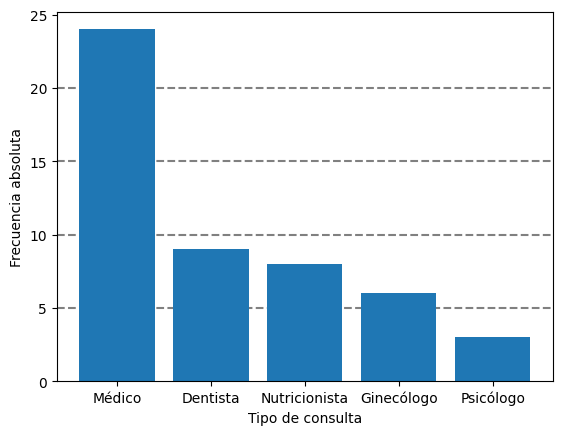

In [57]:
import matplotlib.pyplot as plt

plt.bar(frec.index,frec['Frecuencia absoluta'])
plt.xlabel('Tipo de consulta')
plt.ylabel('Frecuencia absoluta')

for j in [5, 10, 15, 20]:
    plt.axhline(y = j,color = 'gray', linestyle='--', zorder=0)

plt.show()

### Ejercicio 3
Considere el siguiente conjunto de datos, el que describe, la edad en años
de niños que asisten a un jardín infantil de la comuna de Concepción.

|Edades|
|:--:|
|1.20 1.66 1.75 1.95 2.00 2.08|
|2.51 2.51 2.66 2.68 2.76 2.79|
|2.85 2.90 2.95 2.96 3.00 3.00|
|3.00 3.06 3.10 3.25 3.30 3.30|
|3.31 3.50 3.53 3.55 3.55 3.60|

1. Identifique el tipo de variable
    - R. Cuantitativa continua

2. Construya la tabla frecuencia apropiada para resumir los datos
(considere 5 intervalos).


In [58]:
import pandas as pd
import numpy as np

# Datos
edades = pd.DataFrame(
    {
        'Edades' : [1.20, 1.66, 1.75, 1.95, 2.00, 2.08,
                    2.51, 2.51, 2.66, 2.68, 2.76, 2.79,
                    2.85, 2.90, 2.95, 2.96, 3.00, 3.00,
                    3.00, 3.06, 3.10, 3.25, 3.30, 3.30,
                    3.31, 3.50, 3.53, 3.55, 3.55, 3.60]
    }
)

# Calculo de intervalos segun la formula de stuges
#k = round(1 + 3.322*np.log10(len(edades)))
k = 5

# Construccion de intervalos
h = (max(edades['Edades'])-min(edades['Edades']))/k
intervalos = [min(edades['Edades']) + i*h for i in range(k+1)]
etiquetas = [str(round(intervalos[i],2))+'-'+str(round(intervalos[i+1],2)) for i in range(k)]

# Agrupación de datos
edades['Grupo edad'] = pd.cut(edades['Edades'], bins=intervalos, labels=etiquetas, right=False)
grupo = edades.groupby(['Grupo edad'], observed=True).count()
grupo.columns = ['Frecuencia absoluta']

# Despliegue de la tabla de frecuencias por grupos
print('La tabla de frecuencia para los datos agrupados por la variable edad es:')
display(grupo)

La tabla de frecuencia para los datos agrupados por la variable edad es:


,Frecuencia absoluta
Grupo edad,
1.2-1.68,2
1.68-2.16,4
2.16-2.64,2
2.64-3.12,13
3.12-3.6,9


3. Realice los gráficos apropiados para representar los datos.

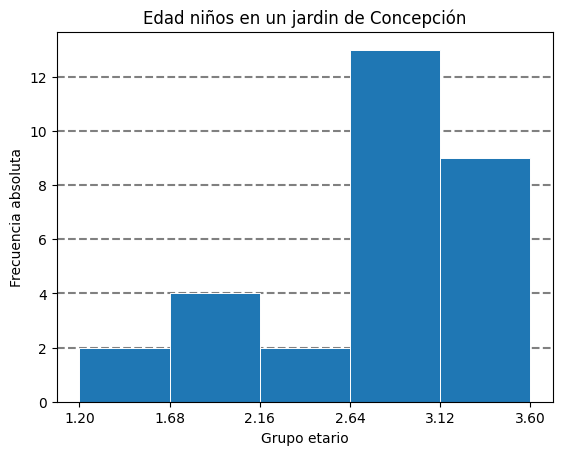

In [59]:
import matplotlib.pyplot as plt

plt.hist(edades['Edades'], intervalos, edgecolor='white',linewidth = .7)
plt.xticks(intervalos)

plt.xlabel('Grupo etario')
plt.ylabel('Frecuencia absoluta')

plt.title('Edad niños en un jardin de Concepción')

lineas = range(1, 7)
for ord in lineas:
    plt.axhline(y=2*ord, color = 'gray', linestyle='--', zorder=0)

plt.show()

### Ejercicio 4
El tiempo utilizado (minutos) para atender entrevistas de 82 aspirantes a
empleo en una empresa, se clasifican de acuerdo a la siguiente tabla:

| Tiempo necesario | N° Entrevistas |
| -- | -- |
| [12.5 - 20.5] | 9 |
| (20.5 - 28.5] | 14 |
| (28.5 - 36.5] | 20 |
| (36.5 - 44.5] | 30 |
| (44.5 - 52.5] | 9 |

1. Tiempo medio de duración de las entrevistas a los aspirantes al
empleo. 

In [60]:
import pandas as pd

# Datos
datos = pd.DataFrame(
    {
        'Rango tiempo' : ["12.5-20.5", "20.5-28.5", "28.5-36.5", "36.5-44.5", "44.5-52.5"],
        'N° entrevistas' : [9,14,20,30,9]
    }
)

# Calucamos el tiempo medio por rango 
datos['Infimo'] = datos['Rango tiempo'].str.split('-').str[0].astype(float)
datos['Supremo'] = datos['Rango tiempo'].str.split('-').str[1].astype(float)
datos['Promedio rango'] = (datos['Infimo'] + datos['Supremo'])/2

# Calculamos el promedio de tiempo
media = (datos['N° entrevistas']*datos['Promedio rango']).sum()/datos['N° entrevistas'].sum()

# Desplegamos
print(f"El tiempo promedio de las entrevistas fue {media:.2f} minutos.")

El tiempo promedio de las entrevistas fue 34.06 minutos.


2. Desviación estándar de los tiempos de duración de las entrevistas.
Interprete. 

In [61]:
# Calculo de varianza y desviacion estandar para población
varianza = 0
for i, xi in enumerate(datos['Promedio rango']):
    varianza += datos['N° entrevistas'][i]*(xi-media)**2/datos['N° entrevistas'].sum()
dest = varianza**(1/2)

# despliegue informacion
print(f"La desviación estandar de los datos es {dest:.2f} minutos.")

La desviación estandar de los datos es 9.39 minutos.


3. El tiempo utilizado bajo el cual se encuentra el 75 % de la muestra. 

In [62]:
# Calculamos el tercer cuartil de la poblacion
tc = .75*datos['N° entrevistas'].sum() # Tercer cuartil

# Calculamos la frecuencia acumulada de los datos y guardamos el indice de donde esta el tercer cuartil
f_a = []
for i, f in enumerate(datos['N° entrevistas']):
    if i==0:
        f_a.append(f)
    else:
        f_a.append(f_a[-1] + f)
datos['Frecuencia acumulada'] = f_a

# Calculo del tercer cuartil
i = datos[datos['Frecuencia acumulada']>=tc].index[0]
q_3 = datos['Infimo'][i]+(tc - datos['Frecuencia acumulada'][i-1])*(datos['Supremo'][i]-datos['Infimo'][i])/datos['N° entrevistas'][i]

# Desplegamos los datos
print(f'El timepo utilizado bajo el cual se encuentra el 75% de la muestra es {q_3:.2f} minutos.')

El timepo utilizado bajo el cual se encuentra el 75% de la muestra es 41.43 minutos.


4. Si la empresa pide al entrevistador que demore a lo más 40 minutos
por entrevista, ¿Qué porcentaje de entrevistados excede este
tiempo?

In [63]:
# Indice para saber en que grupo esta contido el 40
minuto = 40
i = datos[datos['Supremo']>=minuto].index[0]

# Porcentaje de tiempo entre 40 y el supremo del intervalo que esta contenido
porc = (datos['Supremo'][i] - minuto)/(datos['Supremo'][i] - datos['Infimo'][i])

# Calculo de entrevistados con entrevistas mayores o iguales a 40
n = porc*datos["N° entrevistas"][i] + datos["N° entrevistas"][i+1:].sum()

# Calculo porcentual de lo anterior y despliegue
n_porc = n/datos["N° entrevistas"].sum()*100

print(f'El {n_porc:.2f}% de los entrevistados excede los {minuto} minutos en su entrevista.')

El 31.55% de los entrevistados excede los 40 minutos en su entrevista.


5. Realice el histograma de los tiempos de duración de las entrevistas a
los postulantes. Comente la forma del histograma.

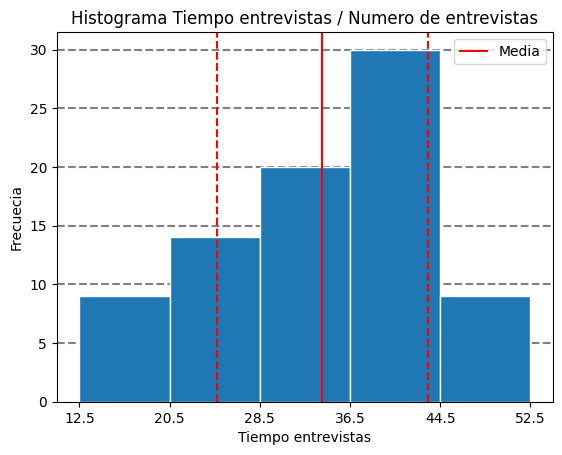

In [64]:
import matplotlib.pyplot as plt

# Estructurar los datos para el histograma
val = []
for i, k in enumerate(datos["N° entrevistas"]):
    for j in range(k):
        val.append(datos["Promedio rango"][i])

ind = list(datos["Infimo"])
ind.append(list(datos["Supremo"])[-1])

# Grafico
plt.hist(val,ind, edgecolor='white')
plt.xlabel('Tiempo entrevistas')
plt.ylabel('Frecuecia')
plt.title('Histograma Tiempo entrevistas / Numero de entrevistas')
plt.xticks(ind)
lineas = range(1, 7)
for lin in lineas:
    plt.axhline(y=5*lin, color = 'grey', linestyle='--', zorder=0)

plt.axvline(x = media, color='red', linestyle = '-', label='Media')
plt.axvline(x = media+dest, color='red', linestyle = '--')
plt.axvline(x = media-dest, color='red', linestyle = '--')

plt.legend()
plt.show()

### Ejercicio 5
En una clínica infantil se ha ido anotando, durante un mes, el número de
metros que cada niño anda, seguido y sin caerse, el primer día que comienza
a caminar, obteniéndose la tabla de información adjunta:

|Metros|1|2|3|4|5|6|7|8|
|-|-|-|-|-|-|-|-|-|
|Niños|2|6|10|5|10|3|2|2|

1. Tabla de Frecuencia. Diagrama de Barras para las frecuencias
absolutas, relativas y acumuladas

In [65]:
# Tabla de frecuencias

import pandas as pd

print("Tabla de frecuencias metros caminados el primer día vs niños:")
datos = pd.DataFrame(
    {
        'Metros' : range(1, 9),
        'Frecuencia absoluta' : [2,6,10,5,10,3,2,2]
    }
)
datos["Frecuencia absoluta acumulada"] = datos["Frecuencia absoluta"].cumsum()
datos["Frecuencia relativa"] = datos["Frecuencia absoluta"]/datos["Frecuencia absoluta"].sum()
datos["Frecuencia relativa acumulada"] = datos["Frecuencia relativa"].cumsum()
datos.style

Tabla de frecuencias metros caminados el primer día vs niños:


,Metros,Frecuencia absoluta,Frecuencia absoluta acumulada,Frecuencia relativa,Frecuencia relativa acumulada
0,1,2,2,0.050000,0.050000
1,2,6,8,0.150000,0.200000
2,3,10,18,0.250000,0.450000
3,4,5,23,0.125000,0.575000
4,5,10,33,0.250000,0.825000
5,6,3,36,0.075000,0.900000
6,7,2,38,0.050000,0.950000
7,8,2,40,0.050000,1.000000


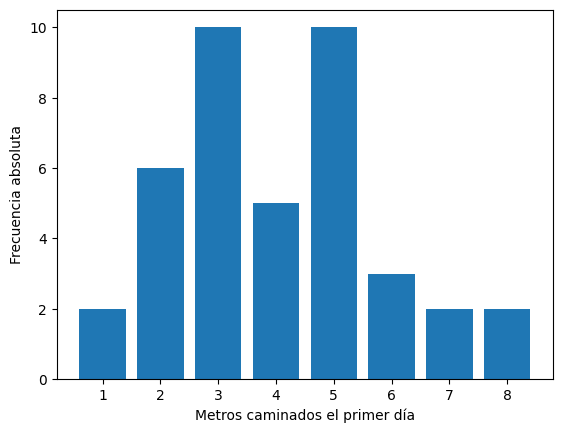

In [66]:
# Diagrama de barras
import matplotlib.pyplot as plt

plt.bar(datos['Metros'], datos['Frecuencia absoluta'])
plt.xlabel('Metros caminados el primer día')
plt.ylabel('Frecuencia absoluta')


plt.show()

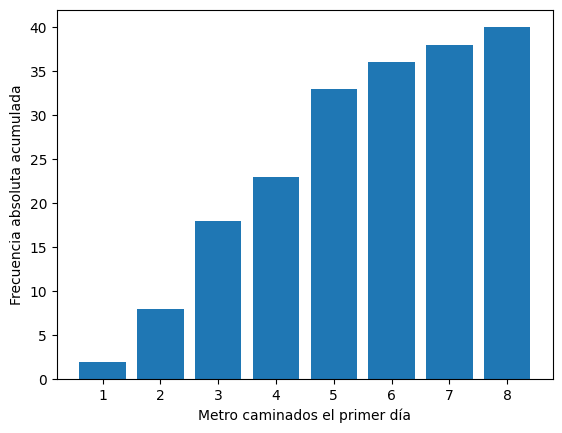

In [67]:
plt.bar(datos['Metros'], datos['Frecuencia absoluta acumulada'])
plt.xlabel('Metro caminados el primer día')
plt.ylabel('Frecuencia absoluta acumulada')

plt.show()

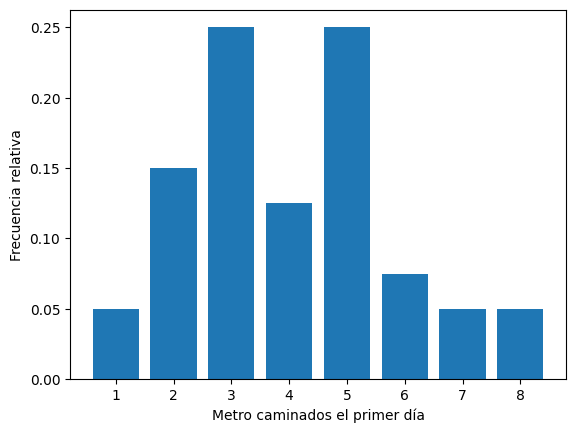

In [68]:
plt.bar(datos['Metros'], datos['Frecuencia relativa'])
plt.xlabel('Metro caminados el primer día')
plt.ylabel('Frecuencia relativa')

plt.show()

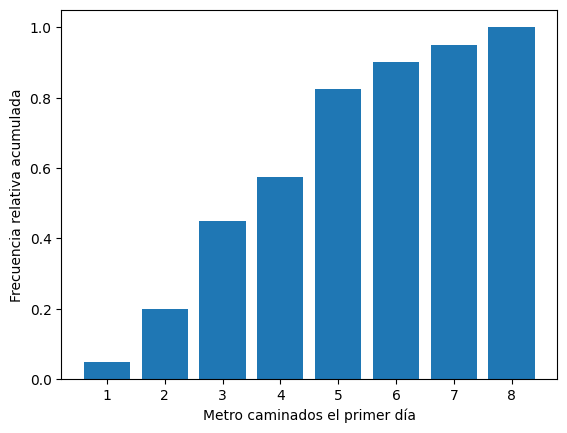

In [69]:
plt.bar(datos['Metros'], datos['Frecuencia relativa acumulada'])
plt.xlabel('Metro caminados el primer día')
plt.ylabel('Frecuencia relativa acumulada')

plt.show()

2. Mediana, media aritmética, moda y cuartiles

In [70]:
# mediana
mediana = datos[datos['Frecuencia absoluta acumulada']>=((datos['Frecuencia absoluta'].sum())/2)]['Metros'].values[0]

print(f"La mediana de los datos es {mediana} metros.")

# Media aritmetica
media = (datos['Metros']*datos['Frecuencia absoluta']).sum()/datos['Frecuencia absoluta'].sum()
print(f"\nLa media aritmetica es {media} metros.")

# Moda
moda = datos[datos['Frecuencia absoluta']==max(datos['Frecuencia absoluta'])]['Metros']
print('\nLa(las) moda(s) es(son):')
for i, m in enumerate(moda):
    print(f"\t{i+1}. {m} metros.")

# Cuartiles 
Q = []
for i in range(1, 4):
    q = i*.25*datos['Frecuencia absoluta'].sum()
    Q.append(datos[datos['Frecuencia absoluta acumulada']>=q]['Metros'].values[0])

print("\nLos cuartiles son:")
for i, q in enumerate(Q):
    print(f"\tCuartil {i+1} = {q} metros.")

La mediana de los datos es 4 metros.

La media aritmetica es 4.05 metros.

La(las) moda(s) es(son):
	1. 3 metros.
	2. 5 metros.

Los cuartiles son:
	Cuartil 1 = 3 metros.
	Cuartil 2 = 4 metros.
	Cuartil 3 = 5 metros.


3. Varianza y desviación Estándar

In [71]:
# Varianza y desviacion estandar
varianza = 0
for i, xi in enumerate(datos['Metros']):
    varianza += ((xi-media)**2)*datos['Frecuencia relativa'][i]

dest = varianza**1/2

print(f"La varianza y la desviación estandar son {varianza} y {dest}, resp.")


La varianza y la desviación estandar son 3.0975 y 1.54875, resp.


4. ¿Entre qué dos valores se encuentran, como mínimo, el 75% de las
observaciones?
    - R: Como vimos en el calculo de los cuartiles, una estimación sería entre 1 y 5 metros.